# <center> SERVO PREDICTION USING LINEAR REGRESSION </center>


## OBJECTIVE

* **To import and analyse the data**

* **Then visualize the data using various plot**

* **Now clean and preprocess the data**

* **Then split train-teat data and perform modeling**

## Data Source

The data is downloaded from https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv

This is in the CSV format

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression

# IMPORTING DATA

In [2]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# DESCRIBE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [5]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [6]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [7]:
df.shape

(167, 5)

In [8]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [9]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [10]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [11]:
numerical_features

Index(['Pgain', 'Vgain', 'Class'], dtype='object')

In [12]:
categorical_features

Index(['Motor', 'Screw'], dtype='object')

# DATA VISUALIZATION

## ∙ Heatmap Correlation

<Axes: >

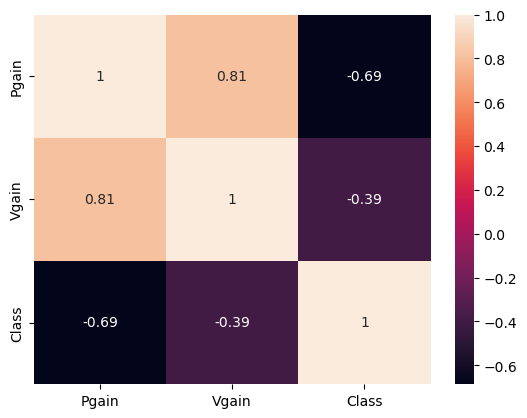

In [13]:
df.corr()
#plotting the correlation
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

## ∙ Univariate Analysis

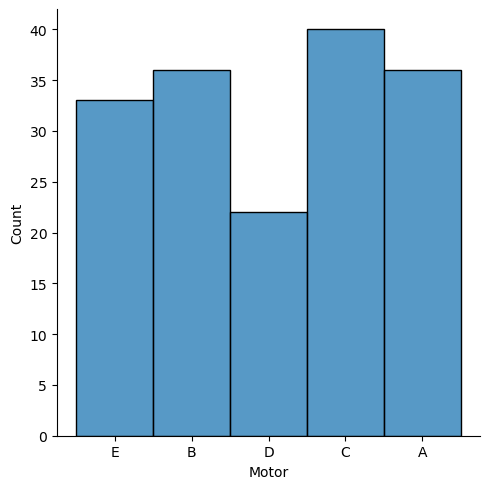

In [14]:
sns.displot(df.Motor)

<Axes: xlabel='Vgain', ylabel='Density'>

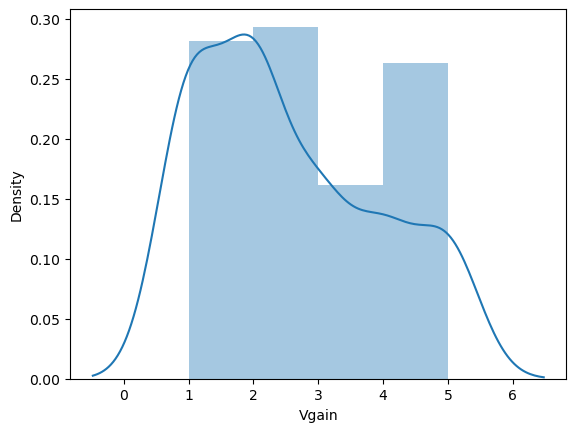

In [15]:
sns.distplot(df['Vgain'])

<Axes: ylabel='Pgain'>

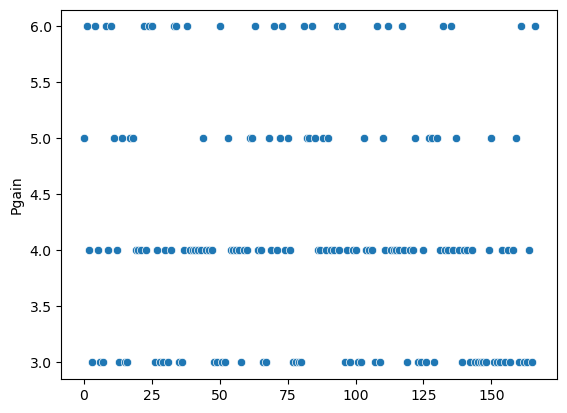

In [16]:
sns.scatterplot(df.Pgain)

## ∙ Multivariate Analysis

In [17]:
plt.figure()

import plotly.express as px

fig = px.scatter_3d(df, x='Motor', y='Vgain', z='Screw',#hue='Pgain')

color='Pgain')

fig.show()

<Figure size 640x480 with 0 Axes>

## ∙ Histogram Analysis

array([[<Axes: title={'center': 'Pgain'}>,
        <Axes: title={'center': 'Vgain'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

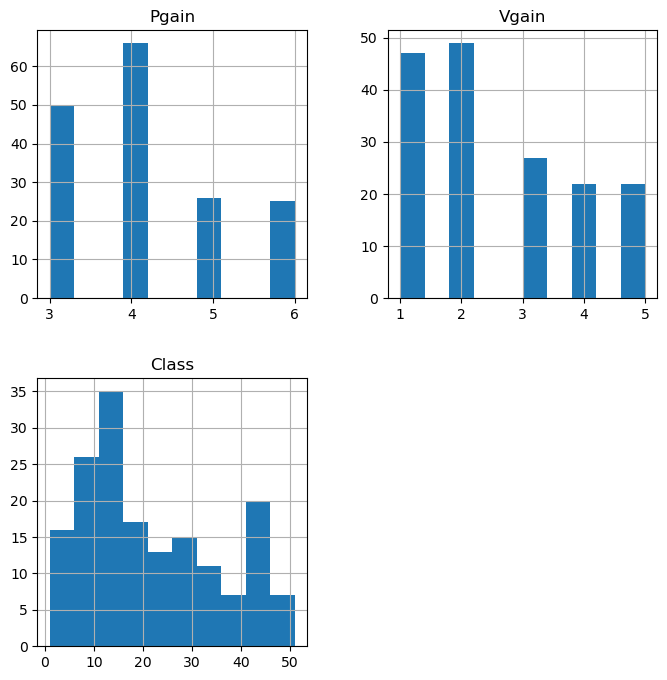

In [18]:
df.hist(figsize=(8,8))

## ∙ Pairplot Analysis

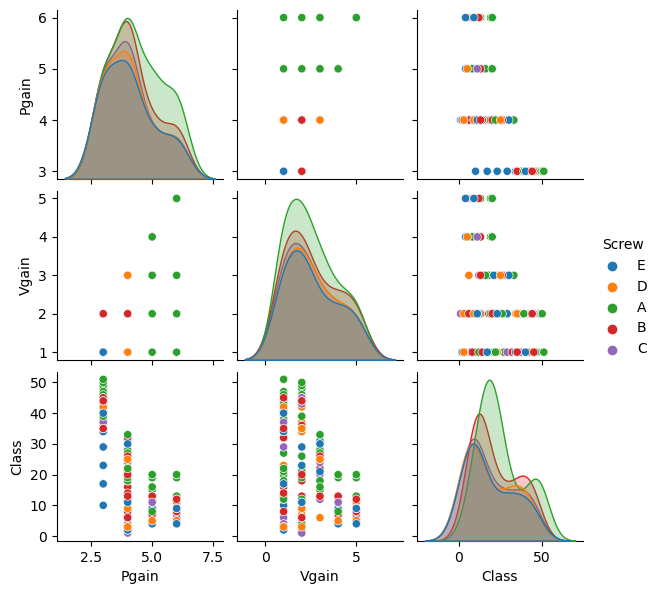

In [19]:
sns.pairplot(df,hue='Screw',size=2)

# DATA PREPROCESSING

In [20]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

In [21]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


# Define Target Variable (y) and Feature Variables (X)

In [22]:
y = df['Class']
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

# TRAIN-TEST SPLIT

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((125, 4), (42, 4), (125,), (42,))

# MODELING

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

# PREDICTION

In [27]:
y_pred = lr.predict(x_test)

In [28]:
y_pred.shape

(42,)

In [29]:
y_pred

array([25.56654851, 31.24940687, 19.04876502, 24.47852818, 39.37546387,
       24.37566459, 11.92192754, 19.94086363, 41.22109189, 41.9215261 ,
       13.76755557, 25.9225073 , 17.203137  , 15.50606268, 22.23125126,
       21.48770634, -4.92349976, 31.10343258, 32.9490606 ,  0.46057329,
       34.2402287 , 32.24862639, 34.53901401, 30.10421306, 18.94164411,
        7.03978758, 29.21211445, 16.9500418 , 24.77731349,  4.04896574,
       31.05774247, 23.93090499, 35.93988243, 31.94984108, 11.81480663,
        3.60420614, 22.63290015, 33.09503489, 16.65125649, 38.23027006,
       28.55737035, 21.78649166])

# MODEL EVALUATION

In [30]:
mean_squared_error(y_test,y_pred)

60.211561593192876

In [31]:
mean_absolute_error(y_test,y_pred)

6.735955685746795

In [32]:
r2_score(y_test, y_pred)

0.706476624263817